# Nutrition: Muscle mass

My initial approach for reducing the number of dimensions in body composition was to conduct a PCA on these variables. The regression models did not, however, explain a great deal of variance in the two body composition principal components. Here we explored whether three individual body composition measures (muscle_mass, visceral_fat and body_fat) would produce better models. Muscle_mass was the most promising of the three

The aim of these analyses are therefore to determine whether a variety of features (diet, age, sex, income, exercise, smoking, alcohol use etc.) predict muscle_mass.

Since all the dependent variables are continious, I will be using the following supervised regression models: 

* Multiple linear regression (forward method), 
* Regression tree, 
* Random forest, 
* Gradient boosting tree
* Support vector regression.

## 1. Install and import the necesary packages and libraries

I already have the most recent versions of **pandas, numpy, seaborn and matplotlib** installed, but you can install them using pip (see pypi.org) or conda install in Anaconda prompt (see anaconda.org). If you get the ImportError: cannot import name 'html5lib' from 'pip._vendor', you can install html5lib in Anaconda prompt (conda install -c anaconda html5lib).

Currently installed versions: 
<br>Pandas 1.4.4
<br>numpy 1.21.5
<br>seaborn 0.12.2
<br>matplotlib 3.5.1
<br>scikit learn 1.1.1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from tabulate import tabulate
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV

## 2. Read csv file into Pandas dataframe

In [2]:
# Read the csv file into the pandas dataframe
df2 = pd.read_csv('nutrition2.csv')

# If the rows are truncated so we can't see the full list, you can correct that with:
pd.set_option('display.max_rows', None)

# Let's display max columns too 
pd.set_option('display.max_columns', None)

df2.head()

,Unnamed: 0,id,age,sex,income,items_home,exercise_stren,exercise_mod,fruit_juice,fruit,veg,red_meat,chicken,pork,fish,eggs,bread,pap_samp,rice_pasta,dairy,soft_drinks,take_away,smoke,alcohol,avg_systbp,avg_diabp,body_fat,muscle_mass,bmi,visceral_fat,metabolic_age,bfat_rarm,bfat_rleg,bfat_trunk,ecw_percentage,fat_rarm,fat_rleg,fat_trunk,muscle_rarm,muscle_rleg,muscle_trunk,left_grip,right_grip,sitting_height,standing_height,exercise,fruitveg_index,carbs_index,protein_index,junkfood_index,avg_grip,age_scaled,fruit_juice_scaled,fruit_scaled,veg_scaled,red_meat_scaled,chicken_scaled,pork_scaled,fish_scaled,eggs_scaled,bread_scaled,pap_samp_scaled,rice_pasta_scaled,dairy_scaled,soft_drinks_scaled,take_away_scaled,avg_systbp_scaled,avg_diabp_scaled,body_fat_scaled,muscle_mass_scaled,bmi_scaled,visceral_fat_scaled,metabolic_age_scaled,bfat_rarm_scaled,bfat_rleg_scaled,bfat_trunk_scaled,ecw_percentage_scaled,fat_rarm_scaled,fat_rleg_scaled,fat_trunk_scaled,muscle_rarm_scaled,muscle_rleg_scaled,muscle_trunk_scaled,sitting_height_scaled,standing_height_scaled,exercise_scaled,fruitveg_index_scaled,carbs_index_scaled,protein_index_scaled,junkfood_index_scaled,avg_grip_scaled,pc1_bodycomp,pc2_bodycomp
0,0,1,20.8,1,2,7,0,1,2,5,8,3,3,0,0,1,6,4,4,8,6,3,False,True,119.0,71.5,3.2,51.7,18.1,1,12,7.0,2.0,3.0,38.4,0.2,0.2,0.9,3.0,9.8,26.6,50,50,131.5,176.4,1,15,14,7,9,50.0,0.258929,0.25,0.625,1.000,0.375,0.375,0.0,0.00,0.125,0.750,0.500,0.500,1.000,0.750,0.375,0.587629,0.492958,0.000000,0.498851,0.111913,0.000000,0.000000,0.031311,0.000000,0.000000,0.313433,0.000000,0.000000,0.000000,0.545455,0.602410,0.465753,0.746388,0.581395,0.047619,0.714286,0.583333,0.285714,0.5625,0.724490,-1.106312,0.227749
1,1,2,20.6,0,2,9,0,7,0,0,5,0,5,0,0,6,8,6,6,4,2,5,False,True,119.0,74.0,20.3,36.2,17.4,1,12,18.1,29.2,14.3,40.6,0.4,2.6,3.7,1.7,6.0,21.0,23,26,129.9,165.8,7,5,20,11,7,24.5,0.241071,0.00,0.000,0.625,0.000,0.625,0.0,0.00,0.750,1.000,0.750,0.750,0.500,0.250,0.625,0.587629,0.528169,0.372549,0.142529,0.086643,0.000000,0.000000,0.248532,0.509363,0.261574,0.477612,0.052632,0.235294,0.124444,0.151515,0.144578,0.210046,0.720706,0.375969,0.333333,0.238095,0.833333,0.476190,0.4375,0.204082,-0.318955,-0.635933
2,2,3,19.9,0,2,4,0,7,0,2,4,1,1,0,4,0,8,0,8,3,1,2,False,False,101.5,63.0,20.0,33.3,18.5,1,12,22.5,30.1,11.8,40.9,0.5,2.6,2.7,1.5,5.7,19.1,22,24,123.2,154.0,7,6,16,6,3,23.0,0.178571,0.00,0.250,0.500,0.125,0.125,0.0,0.50,0.000,1.000,0.000,1.000,0.375,0.125,0.250,0.407216,0.373239,0.366013,0.075862,0.126354,0.000000,0.000000,0.334638,0.526217,0.203704,0.500000,0.078947,0.235294,0.080000,0.090909,0.108434,0.123288,0.613162,0.147287,0.333333,0.285714,0.666667,0.238095,0.1875,0.173469,-0.252522,-0.825377
3,3,4,23.1,0,2,9,3,5,0,8,2,0,4,0,0,3,1,0,5,4,1,0,False,False,117.0,78.0,39.6,42.9,29.6,6,38,45.4,42.6,36.4,44.8,1.7,5.7,14.8,1.9,7.3,24.6,31,35,124.5,159.0,11,10,6,7,1,33.0,0.464286,0.00,1.000,0.250,0.000,0.500,0.0,0.00,0.375,0.125,0.000,0.625,0.500,0.125,0.000,0.567010,0.584507,0.793028,0.296552,0.527076,0.357143,0.838710,0.782779,0.760300,0.773148,0.791045,0.394737,0.539216,0.617778,0.212121,0.301205,0.374429,0.634029,0.244186,0.523810,0.476190,0.250000,0.285714,0.0625,0.377551,1.085679,-0.022105
4,4,5,22.5,0,1,9,0,5,4,7,3,4,5,0,2,2,8,5,2,0,5,6,False,False,118.5,83.0,24.6,42.0,22.3,1,15,23.0,35.1,17.5,40.8,0.7,3.8,5.5,2.1,6.6,24.8,24,30,127.5,162.5,5,14,15,13,11,27.0,0.410714,0.50,0.875,0.375,0.500,0.625,0.0,0.25,0.250,1.000,0.625,0.250,0.000,0.625,0.750,0.582474,0.654930,0.466231,0.275862,0.263538,0.000000,0.096774,0.344423,0.619850,0.335648,0.492537,0.131579,0.352941,0.204444,0.272727,0.216867,0.383562,0.682183,0.312016,0.238095,0.666667,0.625000,0.571429,0.6875,0.255102,-0.062037,-0.399174


In [3]:
# Drop the unnecesary column
df2 = df2.drop(['Unnamed: 0'], axis=1)
df2.head()

,id,age,sex,income,items_home,exercise_stren,exercise_mod,fruit_juice,fruit,veg,red_meat,chicken,pork,fish,eggs,bread,pap_samp,rice_pasta,dairy,soft_drinks,take_away,smoke,alcohol,avg_systbp,avg_diabp,body_fat,muscle_mass,bmi,visceral_fat,metabolic_age,bfat_rarm,bfat_rleg,bfat_trunk,ecw_percentage,fat_rarm,fat_rleg,fat_trunk,muscle_rarm,muscle_rleg,muscle_trunk,left_grip,right_grip,sitting_height,standing_height,exercise,fruitveg_index,carbs_index,protein_index,junkfood_index,avg_grip,age_scaled,fruit_juice_scaled,fruit_scaled,veg_scaled,red_meat_scaled,chicken_scaled,pork_scaled,fish_scaled,eggs_scaled,bread_scaled,pap_samp_scaled,rice_pasta_scaled,dairy_scaled,soft_drinks_scaled,take_away_scaled,avg_systbp_scaled,avg_diabp_scaled,body_fat_scaled,muscle_mass_scaled,bmi_scaled,visceral_fat_scaled,metabolic_age_scaled,bfat_rarm_scaled,bfat_rleg_scaled,bfat_trunk_scaled,ecw_percentage_scaled,fat_rarm_scaled,fat_rleg_scaled,fat_trunk_scaled,muscle_rarm_scaled,muscle_rleg_scaled,muscle_trunk_scaled,sitting_height_scaled,standing_height_scaled,exercise_scaled,fruitveg_index_scaled,carbs_index_scaled,protein_index_scaled,junkfood_index_scaled,avg_grip_scaled,pc1_bodycomp,pc2_bodycomp
0,1,20.8,1,2,7,0,1,2,5,8,3,3,0,0,1,6,4,4,8,6,3,False,True,119.0,71.5,3.2,51.7,18.1,1,12,7.0,2.0,3.0,38.4,0.2,0.2,0.9,3.0,9.8,26.6,50,50,131.5,176.4,1,15,14,7,9,50.0,0.258929,0.25,0.625,1.000,0.375,0.375,0.0,0.00,0.125,0.750,0.500,0.500,1.000,0.750,0.375,0.587629,0.492958,0.000000,0.498851,0.111913,0.000000,0.000000,0.031311,0.000000,0.000000,0.313433,0.000000,0.000000,0.000000,0.545455,0.602410,0.465753,0.746388,0.581395,0.047619,0.714286,0.583333,0.285714,0.5625,0.724490,-1.106312,0.227749
1,2,20.6,0,2,9,0,7,0,0,5,0,5,0,0,6,8,6,6,4,2,5,False,True,119.0,74.0,20.3,36.2,17.4,1,12,18.1,29.2,14.3,40.6,0.4,2.6,3.7,1.7,6.0,21.0,23,26,129.9,165.8,7,5,20,11,7,24.5,0.241071,0.00,0.000,0.625,0.000,0.625,0.0,0.00,0.750,1.000,0.750,0.750,0.500,0.250,0.625,0.587629,0.528169,0.372549,0.142529,0.086643,0.000000,0.000000,0.248532,0.509363,0.261574,0.477612,0.052632,0.235294,0.124444,0.151515,0.144578,0.210046,0.720706,0.375969,0.333333,0.238095,0.833333,0.476190,0.4375,0.204082,-0.318955,-0.635933
2,3,19.9,0,2,4,0,7,0,2,4,1,1,0,4,0,8,0,8,3,1,2,False,False,101.5,63.0,20.0,33.3,18.5,1,12,22.5,30.1,11.8,40.9,0.5,2.6,2.7,1.5,5.7,19.1,22,24,123.2,154.0,7,6,16,6,3,23.0,0.178571,0.00,0.250,0.500,0.125,0.125,0.0,0.50,0.000,1.000,0.000,1.000,0.375,0.125,0.250,0.407216,0.373239,0.366013,0.075862,0.126354,0.000000,0.000000,0.334638,0.526217,0.203704,0.500000,0.078947,0.235294,0.080000,0.090909,0.108434,0.123288,0.613162,0.147287,0.333333,0.285714,0.666667,0.238095,0.1875,0.173469,-0.252522,-0.825377
3,4,23.1,0,2,9,3,5,0,8,2,0,4,0,0,3,1,0,5,4,1,0,False,False,117.0,78.0,39.6,42.9,29.6,6,38,45.4,42.6,36.4,44.8,1.7,5.7,14.8,1.9,7.3,24.6,31,35,124.5,159.0,11,10,6,7,1,33.0,0.464286,0.00,1.000,0.250,0.000,0.500,0.0,0.00,0.375,0.125,0.000,0.625,0.500,0.125,0.000,0.567010,0.584507,0.793028,0.296552,0.527076,0.357143,0.838710,0.782779,0.760300,0.773148,0.791045,0.394737,0.539216,0.617778,0.212121,0.301205,0.374429,0.634029,0.244186,0.523810,0.476190,0.250000,0.285714,0.0625,0.377551,1.085679,-0.022105
4,5,22.5,0,1,9,0,5,4,7,3,4,5,0,2,2,8,5,2,0,5,6,False,False,118.5,83.0,24.6,42.0,22.3,1,15,23.0,35.1,17.5,40.8,0.7,3.8,5.5,2.1,6.6,24.8,24,30,127.5,162.5,5,14,15,13,11,27.0,0.410714,0.50,0.875,0.375,0.500,0.625,0.0,0.25,0.250,1.000,0.625,0.250,0.000,0.625,0.750,0.582474,0.654930,0.466231,0.275862,0.263538,0.000000,0.096774,0.344423,0.619850,0.335648,0.492537,0.131579,0.352941,0.204444,0.272727,0.216867,0.383562,0.682183,0.312016,0.238095,0.666667,0.625000,0.571429,0.6875,0.255102,-0.062037,-0.399174


## 3. Feature selection

We will use individual correlations to select features instead of sequential feature selection (see vcoetzee/compare for why I prefer individual correlations).

In [4]:
df2.columns

Index(['id', 'age', 'sex', 'income', 'items_home', 'exercise_stren',
       'exercise_mod', 'fruit_juice', 'fruit', 'veg', 'red_meat', 'chicken',
       'pork', 'fish', 'eggs', 'bread', 'pap_samp', 'rice_pasta', 'dairy',
       'soft_drinks', 'take_away', 'smoke', 'alcohol', 'avg_systbp',
       'avg_diabp', 'body_fat', 'muscle_mass', 'bmi', 'visceral_fat',
       'metabolic_age', 'bfat_rarm', 'bfat_rleg', 'bfat_trunk',
       'ecw_percentage', 'fat_rarm', 'fat_rleg', 'fat_trunk', 'muscle_rarm',
       'muscle_rleg', 'muscle_trunk', 'left_grip', 'right_grip',
       'sitting_height', 'standing_height', 'exercise', 'fruitveg_index',
       'carbs_index', 'protein_index', 'junkfood_index', 'avg_grip',
       'age_scaled', 'fruit_juice_scaled', 'fruit_scaled', 'veg_scaled',
       'red_meat_scaled', 'chicken_scaled', 'pork_scaled', 'fish_scaled',
       'eggs_scaled', 'bread_scaled', 'pap_samp_scaled', 'rice_pasta_scaled',
       'dairy_scaled', 'soft_drinks_scaled', 'take_away_scaled',
 

In [5]:
# Select the variables to use
all=df2[['body_fat_scaled', 'muscle_mass_scaled','bmi_scaled', 'visceral_fat_scaled', 
         'metabolic_age_scaled', 'bfat_rarm_scaled', 'bfat_rleg_scaled', 'bfat_trunk_scaled',
         'ecw_percentage_scaled', 'fat_rarm_scaled', 'fat_rleg_scaled', 'fat_trunk_scaled', 
         'muscle_rarm_scaled', 'muscle_rleg_scaled', 'muscle_trunk_scaled', 'sitting_height_scaled',
         'standing_height_scaled', 'exercise_scaled', 'avg_grip_scaled', 'sex', 'income', 
         'items_home', 'smoke', 'alcohol', 'age_scaled', 'pc1_bodycomp', 
         'pc2_bodycomp', 'fruitveg_index_scaled', 'carbs_index_scaled', 'protein_index_scaled', 
         'junkfood_index_scaled', 'dairy_scaled', 'avg_systbp_scaled', 'avg_diabp_scaled']]

<AxesSubplot:>

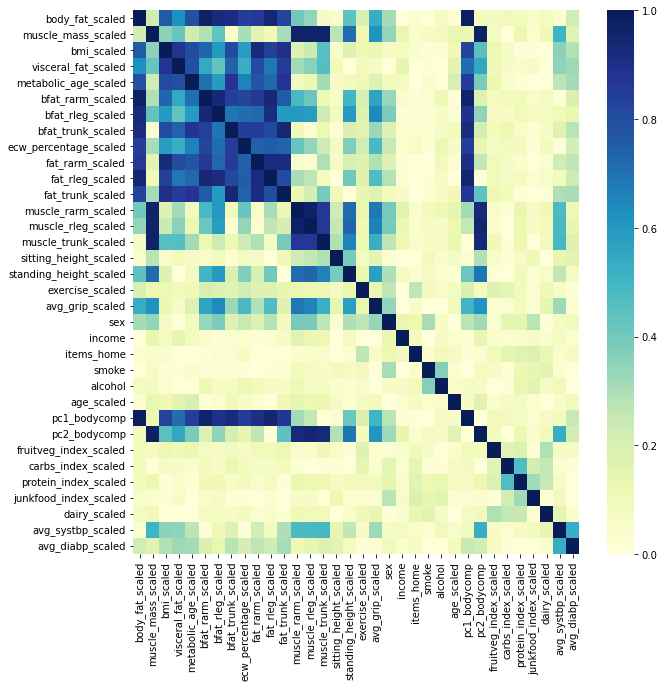

In [6]:
# From a theoretical perspective, Body_fat, muscle_mass and visceral_fat 
   # are the three most useful individual body composition variables
# I briefly compared them here 

# specify size of heatmap
fig, ax = plt.subplots(figsize=(10, 10))

# create heatmap of absolute correlations between the variables 
   # (I specified absolute correlations to more easily interpred the strength of the correlation by colour)
sns.heatmap(abs(all.corr()), cmap="YlGnBu", annot=False)

# Muscle_mass was the most promising individual measure,
   # showing the strongest correlations with a variety of directly observable features 
   # (Sex, standing height etc) and systolic blood pressure

# I will therefore continue the analyses with muscle_mass

In [7]:
# Select the variables we want to use for the muscle mass analyses
# Minimally transformed - Scaled 
   # (see vcoetzee/compare for why I prefer MinMax scaled, minimally transformed variables)
mm = df2[['age_scaled', 'sex', 'income', 'items_home', 'exercise_scaled','fruitveg_index_scaled', 
          'carbs_index_scaled', 'protein_index_scaled', 'junkfood_index_scaled', 'dairy_scaled', 
          'smoke', 'alcohol', 'standing_height_scaled', 'muscle_mass']]

In [8]:
# Identify the most highly correlated variables
mm.corrwith(mm['muscle_mass']).sort_values(ascending=False)

# The most highly correlated variables are: standing height(0.716831), sex(0.341039), 
   # income(0.140209), age_scaled(0.135619), protein_index_scaled(0.126827), 
   # exercised_scaled(0.117574), dairy_scaled(0.101919)

muscle_mass               1.000000
standing_height_scaled    0.716831
sex                       0.341039
income                    0.140209
age_scaled                0.135619
protein_index_scaled      0.126827
exercise_scaled           0.117574
dairy_scaled              0.101919
alcohol                   0.083422
fruitveg_index_scaled     0.076359
smoke                     0.072685
junkfood_index_scaled     0.036484
carbs_index_scaled        0.010783
items_home               -0.045778
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


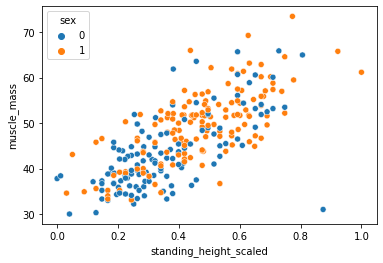

In [9]:
# Visualise the relationships
print(sns.scatterplot(data=mm, x='standing_height_scaled', y='muscle_mass', hue='sex'))

# Taller people have more muscle mass
# Men tend to have more muscle mass than women
# One multivariate outlier 
   # (removing this outlier slightly improved the correlation, but not the overall model; data not shown)

AxesSubplot(0.125,0.125;0.775x0.755)


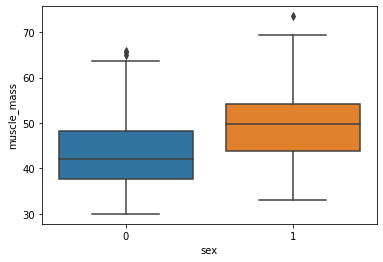

In [10]:
# Visualise the relationships
print(sns.boxplot(data=mm, x='sex', y='muscle_mass'))

# Men (sex=1) have a higher muscle_mass than women

AxesSubplot(0.125,0.125;0.775x0.755)


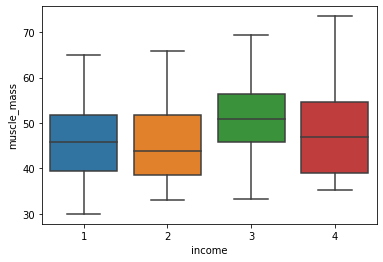

In [11]:
print(sns.boxplot(data=mm, x='income', y='muscle_mass'))

# People with a relatively higher income tend to have a higher muscle mass

AxesSubplot(0.125,0.125;0.775x0.755)


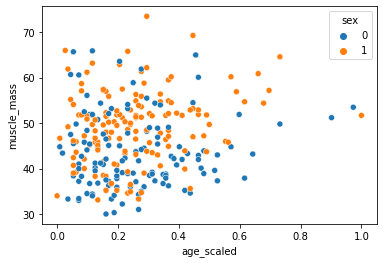

In [12]:
print(sns.scatterplot(data=mm, x='age_scaled', y='muscle_mass', hue='sex'))

# Older people tend to have a higher muscle mass, but relationship quite weak

AxesSubplot(0.125,0.125;0.775x0.755)


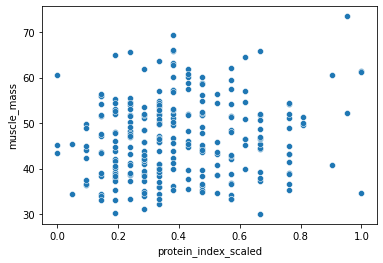

In [13]:
print(sns.scatterplot(data=mm, x='protein_index_scaled', y='muscle_mass'))
# Weak correlation

## 4. Forward linear regression

In [14]:
# Define testing and traing set
x = df2[['age_scaled', 'sex', 'income', 'items_home', 'exercise_scaled','fruitveg_index_scaled', 
         'carbs_index_scaled', 'protein_index_scaled', 'junkfood_index_scaled', 'dairy_scaled', 
         'smoke', 'alcohol', 'standing_height_scaled']].values
y = df2[['muscle_mass']].values #.values creates a numpy array

# Splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (216, 13) (216, 1)
Test set: (54, 13) (54, 1)


In [15]:
# Fit the model - according to correlations
# Step 1
x_train1 = x_train[:, [12]] #standing_height
x_test1 = x_test[:, [12]]
lr1 = LinearRegression()
lr1.fit(x_train1, y_train)

# Evaluate the model
y_pred_lr1=lr1.predict(x_test1)

# Evaluate the predictions
lr_R21 = r2_score(y_test, y_pred_lr1)
lr_MSE1 = mean_squared_error(y_test, y_pred_lr1)
print('Step1 R2:', lr_R21)
print('Step1 MSE:', lr_MSE1)
print()
  
#_________________________________
# Step 2
x_train2 = x_train[:, [12,1]]  # standing_height_scaled, sex
x_test2 = x_test[:, [12,1]]
lr2 = LinearRegression()
lr2.fit(x_train2, y_train)

# Evaluate the model
y_pred_lr2 = lr2.predict(x_test2)

# Evaluate the predictions
lr_R22 = r2_score(y_test, y_pred_lr2)
lr_MSE2 = mean_squared_error(y_test, y_pred_lr2)
print('Step2 R2:', lr_R22)
print('Step2 MSE:', lr_MSE2)
print()
  
#____________________________________
# Step 3
x_train3 = x_train[:, [12,1,2]]  # standing_height_scaled, sex, income
x_test3 = x_test[:, [12,1,2]]
lr3 = LinearRegression()
lr3.fit(x_train3, y_train)

# Evaluate the model
y_pred_lr3 = lr3.predict(x_test3)

# Evaluate the predictions
lr_R23 = r2_score(y_test, y_pred_lr3)
lr_MSE3 = mean_squared_error(y_test, y_pred_lr3)
print('Step3 R2:', lr_R23)
print('Step3 MSE:', lr_MSE3)
print()

#____________________________________
# Step 4
x_train4 = x_train[:, [12,1,2,0]]  # standing_height_scaled, sex, income, age_scaled
x_test4 = x_test[:, [12,1,2,0]]
lr4 = LinearRegression()
lr4.fit(x_train4, y_train)

# Evaluate the model
y_pred_lr4 = lr4.predict(x_test4)

# Evaluate the predictions
lr_R24 = r2_score(y_test, y_pred_lr4)
lr_MSE4 = mean_squared_error(y_test, y_pred_lr4)
print('Step4 R2:', lr_R24)
print('Step4 MSE:', lr_MSE4)
print()

#____________________________________
# Step 5
x_train5 = x_train[:, [12,1,2,0,7]]  # standing_height_scaled, sex, income, age_scaled, protein_index_scaled
x_test5 = x_test[:, [12,1,2,0,7]]
lr5 = LinearRegression()
lr5.fit(x_train5, y_train)

# Evaluate the model
y_pred_lr5 = lr5.predict(x_test5)

# Evaluate the predictions
lr_R25 = r2_score(y_test, y_pred_lr5)
lr_MSE5 = mean_squared_error(y_test, y_pred_lr5)
print('Step5 R2:', lr_R25)
print('Step5 MSE:', lr_MSE5)
print()

#____________________________________
# Step 6
x_train6 = x_train[:, [12,1,2,0,7,4]]  # standing_height_scaled, sex, income, age_scaled, protein_index_scaled, exercise_scaled
x_test6 = x_test[:, [12,1,2,0,7,4]]
lr6 = LinearRegression()
lr6.fit(x_train6, y_train)

# Evaluate the model
y_pred_lr6 = lr6.predict(x_test6)

# Evaluate the predictions
lr_R26 = r2_score(y_test, y_pred_lr6)
lr_MSE6 = mean_squared_error(y_test, y_pred_lr6)
print('Step6 R2:', lr_R26)
print('Step6 MSE:', lr_MSE6)
print()

#____________________________________
# Step 7
x_train7 = x_train[:, [12,1,2,0,7,4,9]]  # standing_height_scaled, sex, income, age_scaled, protein_index_scaled, exercise_scaled, dairy_scaled
x_test7 = x_test[:, [12,1,2,0,7,4,9]]
lr7 = LinearRegression()
lr7.fit(x_train7, y_train)

# Evaluate the model
y_pred_lr7=lr7.predict(x_test7)

# Evaluate the predictions
lr_R27 = r2_score(y_test, y_pred_lr7)
lr_MSE7 = mean_squared_error(y_test, y_pred_lr7)
print('Step7 R2:', lr_R27)
print('Step7 MSE:', lr_MSE7)
print()

# I included more steps than in other analyses because R2 was still increasing by step 4
# Step 4 (standing_height_scaled, sex, income, age_scaled) 
   # and step 7 (standing_height_scaled, sex, income, age_scaled, protein_index_scaled, exercise_scaled, dairy_scaled) 
   # had very similar R2 (highest) and MSE (lowest) values 

Step1 R2: 0.5781519622096799
Step1 MSE: 23.35674935236255

Step2 R2: 0.6091877624435276
Step2 MSE: 21.638368935544573

Step3 R2: 0.6088508351936837
Step3 MSE: 21.657023817444244

Step4 R2: 0.6330145024654098
Step4 MSE: 20.31913749502375

Step5 R2: 0.630448389264517
Step5 MSE: 20.461217242880334

Step6 R2: 0.6234597489584377
Step6 MSE: 20.84816207921982

Step7 R2: 0.6335381093421637
Step7 MSE: 20.290146594310837



In [16]:
# Check for multicolinearity in the step 7 model

# Convert numpy to df
vif_df = pd.DataFrame(x_train7, columns = ['standing_height_scaled', 'sex', 'income', 'age_scaled', 
                                           'protein_index_scaled', 'exercise_scaled', 'dairy_scaled'])

# Convert datatypes to float
vif_df[['standing_height_scaled', 'sex', 'income', 'age_scaled', 'protein_index_scaled', 'exercise_scaled', 
        'dairy_scaled']] = vif_df[['standing_height_scaled', 'sex', 'income', 'age_scaled', 
                                   'protein_index_scaled', 'exercise_scaled', 'dairy_scaled']].astype('float')

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns

  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i)
                          for i in range(len(vif_df.columns))]

  
print(vif_data)

# Generally, a VIF above 5 indicates a high multicollinearity and a VIF above 10 needs to be corrected
# All VIFs within the acceptable range

                  feature       VIF
0  standing_height_scaled  5.533232
1                     sex  2.535187
2                  income  3.806930
3              age_scaled  2.938101
4    protein_index_scaled  4.416003
5         exercise_scaled  2.855368
6            dairy_scaled  3.496437


In [17]:
# Check for multicolinearity in the step 4 model

# Convert numpy to df
vif_df = pd.DataFrame(x_train4, columns = ['standing_height_scaled', 'sex', 'income', 'age_scaled'])

# Convert datatypes to float
vif_df[['standing_height_scaled', 'sex', 'income', 'age_scaled']] = vif_df[['standing_height_scaled', 
                                                                            'sex', 'income', 'age_scaled'
                                                                           ]].astype('float')


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns

  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i)
                          for i in range(len(vif_df.columns))]

  
print(vif_data)

# Generally, a VIF above 5 indicates a high multicollinearity and a VIF above 10 needs to be corrected
# Standing_height's VIF is much lower in the step 4 model
# The step 4 model (standing_height_scaled, sex, income, age_scaled) is preferred because 
   # (a) has a very similar R2 and MSE than the step 7 model, and 
   # (b) it is simpler

                  feature       VIF
0  standing_height_scaled  4.394763
1                     sex  2.385453
2                  income  3.620862
3              age_scaled  2.627586


## 5. Regression tree

In [18]:
# Create the regressor
rt = DecisionTreeRegressor(random_state=1)

# Train the regressor 
rt.fit(x_train, y_train)

# Predicting the test data
y_pred_rt = rt.predict(x_test)

# Evaluate the predictions
# Calculate R2 score (higher R2=better performance) and MSE scores (lower MSE = better performance)
rt_R2 = r2_score(y_test, y_pred_rt)
rt_MSE = mean_squared_error(y_test, y_pred_rt)
print('Regression tree R2:', rt_R2)
print('Regression tree MSE:', rt_MSE)
print()

Regression tree R2: 0.4104207372551767
Regression tree MSE: 32.64363901136896



In [19]:
# Pruning the tree
depth=[]
for i in range(1,5):
    regressor = DecisionTreeRegressor(random_state=1, criterion='squared_error', max_depth=i)
    model = regressor.fit(x_train, y_train)
    # Perform 5-fold cross validation 
    model_scores = cross_val_score(model, x, y, cv = 3, scoring='r2')
    print("mean R2 cross validation score: {}".format(np.mean(model_scores)))

    # Predict the response for test dataset
    y_pred = model.predict(x_test)
    depth.append(mean_squared_error(y_test, y_pred))
print('MSE:', depth)

# The max depth=3 tree produced the highest R2 and lowest MSE

mean R2 cross validation score: 0.29775502949757904
mean R2 cross validation score: 0.30116901505638877
mean R2 cross validation score: 0.3373385166265834
mean R2 cross validation score: 0.25139129092736884
MSE: [42.59035739731239, 33.33739115447433, 32.457813982313716, 35.28950541129829]


Regression tree R2: 0.4137769373280843
Regression tree MSE: 32.457813982313716



[Text(0.5, 0.875, 'standing_height_scaled <= 0.381\nsquared_error = 75.579\nsamples = 216\nvalue = 46.689'),
 Text(0.25, 0.625, 'standing_height_scaled <= 0.253\nsquared_error = 29.946\nsamples = 101\nvalue = 40.549'),
 Text(0.125, 0.375, 'dairy_scaled <= 0.688\nsquared_error = 16.254\nsamples = 46\nvalue = 38.126'),
 Text(0.0625, 0.125, 'squared_error = 12.476\nsamples = 33\nvalue = 37.33'),
 Text(0.1875, 0.125, 'squared_error = 20.156\nsamples = 13\nvalue = 40.146'),
 Text(0.375, 0.375, 'age_scaled <= 0.321\nsquared_error = 32.379\nsamples = 55\nvalue = 42.576'),
 Text(0.3125, 0.125, 'squared_error = 31.489\nsamples = 38\nvalue = 41.228'),
 Text(0.4375, 0.125, 'squared_error = 21.234\nsamples = 17\nvalue = 45.588'),
 Text(0.75, 0.625, 'standing_height_scaled <= 0.587\nsquared_error = 53.472\nsamples = 115\nvalue = 52.081'),
 Text(0.625, 0.375, 'age_scaled <= 0.183\nsquared_error = 34.896\nsamples = 69\nvalue = 49.459'),
 Text(0.5625, 0.125, 'squared_error = 39.111\nsamples = 30\nvalu

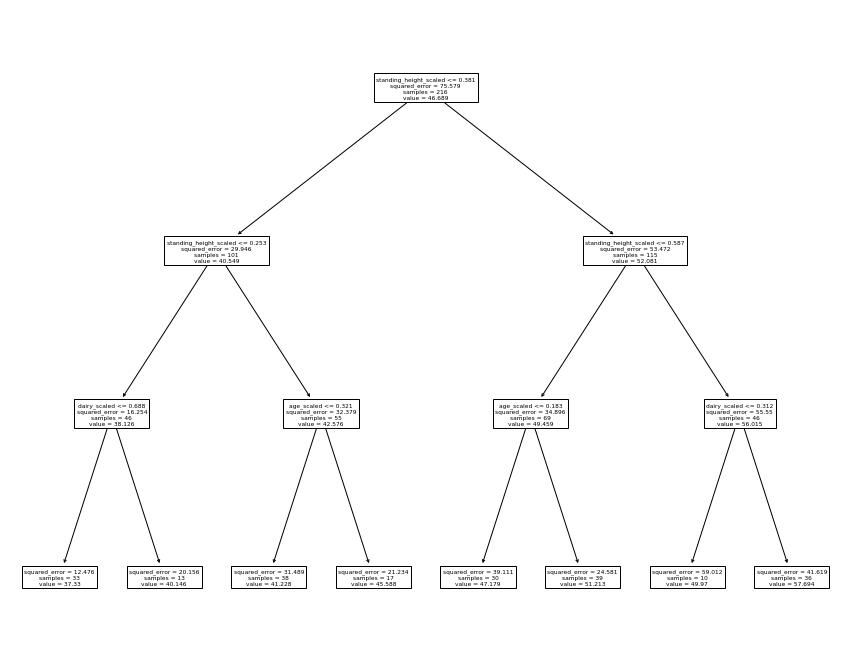

In [20]:
# Create the regressor for max_depth=3
rt3 = DecisionTreeRegressor(max_depth=3, random_state=1)

# Train the regressor 
rt3.fit(x_train, y_train)

# Predicting the test data
y_pred_rt3 = rt3.predict(x_test)

# Evaluate the predictions
# Calculate R2 score (higher R2=better performance) and MSE scores (lower MSE = better performance)
rt3_R2 = r2_score(y_test, y_pred_rt3)
rt3_MSE = mean_squared_error(y_test, y_pred_rt3)
print('Regression tree R2:', rt3_R2)
print('Regression tree MSE:', rt3_MSE)
print()

# plot tree
plt.figure(figsize=(15,12))# set plot size (denoted in inches)
tree.plot_tree(rt3, feature_names=['age_scaled', 'sex', 'income', 'items_home', 'exercise_scaled',
                                   'fruitveg_index_scaled', 'carbs_index_scaled', 'protein_index_scaled', 
                                   'junkfood_index_scaled', 'dairy_scaled', 'smoke', 'alcohol', 
                                   'standing_height_scaled'])

## 4. Random Forest

In [21]:
# Flatten y (otherwise you get the error: 
   # DataConversionWarning: A column-vector y was passed when a 1d array was expected. 
   # Please change the shape of y to (n_samples,), for example using ravel().)
y_train1_1 = np.ravel(y_train, order = 'C')
print('y_train shape:', y_train1_1.shape)
y_test1_1 = np.ravel(y_test, order = 'C')
print('y_test shape:', y_test1_1.shape)

# Create the regressor
rf = RandomForestRegressor(n_estimators = 1000, random_state=1)

# Train the regressor
rf.fit(x_train, y_train1_1) 

# Predicting the test data
y_pred_rf = rf.predict(x_test)

# Evaluate the predictions
# Calculate R2 score (higher R2=better performance) and MSE scores (lower MSE = better performance)
rf_R2 = r2_score(y_test1_1, y_pred_rf)
rf_MSE = mean_squared_error(y_test, y_pred_rf)
print('Random Forest R2:', rf_R2)
print('Random Forest MSE:', rf_MSE)

y_train shape: (216,)
y_test shape: (54,)
Random Forest R2: 0.5277889506664801
Random Forest MSE: 26.145232720464282


## 5. Gradient boosting tree

In [22]:
# Create the regressor
gb = GradientBoostingRegressor(random_state=1)

# Train the regressor
gb.fit(x_train, y_train1_1) 

# Predicting the test data
y_pred_gb = gb.predict(x_test)

# Evaluate the predictions
# Calculate R2 score (higher R2=better pegbormance) and MSE scores (lower MSE = better pegbormance)
gb_R2 = r2_score(y_test1_1, y_pred_gb)
gb_MSE = mean_squared_error(y_test, y_pred_rf)
print('Gradient Boost R2:', gb_R2)
print('Gradient Boost MSE:', gb_MSE)

Gradient Boost R2: 0.48091134592723983
Gradient Boost MSE: 26.145232720464282


## 6. Support Vector Regression

In [23]:
# Create the regressor
svr = svm.SVR()

# Train the regressor
svr.fit(x_train, y_train1_1) 

# Predicting the test data
y_pred_svr = svr.predict(x_test)

# Evaluate the predictions
# Calculate R2 score (higher R2=better pesvrormance) and MSE scores (lower MSE = better pesvrormance)
svr_R2 = r2_score(y_test1_1, y_pred_svr)
svr_MSE = mean_squared_error(y_test, y_pred_svr)
print('Support vector R2:', svr_R2)
print('Support vector MSE:', svr_MSE)

Support vector R2: 0.06947783058464063
Support vector MSE: 51.52085853402518


In [24]:
print('Model comparison')
table = [['Description', 'R2', 'MSE'], ['Linear regr', lr_R24, lr_MSE4], 
         ['Regr Tree', rt3_R2, rt3_MSE], ['Random Forest', rf_R2, rf_MSE], 
         ['Gradient Boost', gb_R2, gb_MSE], ['Support vector', svr_R2, svr_MSE]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

# The linear regression model had the highest R2 and the lowest MSE, followed by random forest
# Let's try and improve the random forest model further

Model comparison
╒════════════════╤═══════════╤═════════╕
│ Description    │        R2 │     MSE │
╞════════════════╪═══════════╪═════════╡
│ Linear regr    │ 0.633015  │ 20.3191 │
├────────────────┼───────────┼─────────┤
│ Regr Tree      │ 0.413777  │ 32.4578 │
├────────────────┼───────────┼─────────┤
│ Random Forest  │ 0.527789  │ 26.1452 │
├────────────────┼───────────┼─────────┤
│ Gradient Boost │ 0.480911  │ 26.1452 │
├────────────────┼───────────┼─────────┤
│ Support vector │ 0.0694778 │ 51.5209 │
╘════════════════╧═══════════╧═════════╛


In [25]:
# Hyperparameter tuning for the random forest model

# Create a randomised hyperparameter grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [500, 666, 833, 1000, 1166, 1333, 1500, 1666, 1833, 2000], 'max_features': ['log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [26]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf2 = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf2_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, 
                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf2_random.fit(x_train, y_train1_1) 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [500, 666, 833, 1000,
                                                         1166, 1333, 1500, 1666,
                                                         1833, 2000]},
                   random_state=42, verbose=2)

In [27]:
# Get parameters for the best model
rf2_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [30]:
# Create the regressor
rf2 = RandomForestRegressor(n_estimators=1000,min_samples_split=5,min_samples_leaf=4, 
                            max_features='sqrt', max_depth=30, bootstrap=False)

# Train the regressor
rf2.fit(x_train, y_train1_1) 

# Predicting the test data
y_pred_rf2 = rf2.predict(x_test)

# Evaluate the predictions
rf2_R2 = r2_score(y_test1_1, y_pred_rf2)
rf2_MSE = mean_squared_error(y_test, y_pred_rf2)

print('Random Forest R2:', rf2_R2)
print('Random Forest MSE:', rf2_MSE)

Random Forest R2: 0.45710186591225554
Random Forest MSE: 30.059012975794694


In [31]:
print('Model comparison')
table2 = [['Description', 'R2', 'MSE'], ['Linear regr', lr_R24, lr_MSE4], 
          ['Regr Tree', rt3_R2, rt3_MSE], ['Random Forest1', rf_R2, rf_MSE], 
          ['Random Forest2', rf2_R2, rf2_MSE], ['Gradient Boost', gb_R2, gb_MSE], 
          ['Support vector', svr_R2, svr_MSE]]
print(tabulate(table2, headers='firstrow', tablefmt='fancy_grid'))

# The hyperparameter tuning did not improve the random forest model
# Linear regression is still the best model

Model comparison
╒════════════════╤═══════════╤═════════╕
│ Description    │        R2 │     MSE │
╞════════════════╪═══════════╪═════════╡
│ Linear regr    │ 0.633015  │ 20.3191 │
├────────────────┼───────────┼─────────┤
│ Regr Tree      │ 0.413777  │ 32.4578 │
├────────────────┼───────────┼─────────┤
│ Random Forest1 │ 0.527789  │ 26.1452 │
├────────────────┼───────────┼─────────┤
│ Random Forest2 │ 0.457102  │ 30.059  │
├────────────────┼───────────┼─────────┤
│ Gradient Boost │ 0.480911  │ 26.1452 │
├────────────────┼───────────┼─────────┤
│ Support vector │ 0.0694778 │ 51.5209 │
╘════════════════╧═══════════╧═════════╛
